In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:
#1.loding and preprocessing the image data
# load CIFAR-10 dataset
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

In [5]:
# Normalize pixel values(0-255 --> 0-1)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [6]:
print(f"Number of images : {x_train.shape[0]}")
print(f"Image height (pixels): {x_train.shape[1]}")
print(f"Image width (pixels): {x_train.shape[2]}")
print(f"Color channels : {x_train.shape[3]}") #RGB

Number of images : 50000
Image height (pixels): 32
Image width (pixels): 32
Color channels : 3


In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_train.max()

np.float32(1.0)

In [9]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
y_train.shape

(50000, 10)

In [11]:
df = pd.DataFrame(y_train)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
print(y_train[1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [13]:
# # Pick an index
idx = 1
 # Get integer label from one-hot encoding
label = np.argmax(y_train[idx])
print("Label:", label)

Label: 9


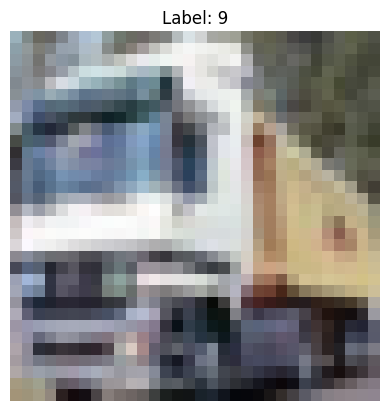

In [14]:
# # Show image
plt.imshow(x_train[idx])
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

In [15]:
# Define the model's architecture (by using CNN)
model = Sequential([
#first layer
Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),MaxPooling2D((2,2)),
#second layer
Conv2D(64, (3,3),activation='relu'),MaxPooling2D((2,2)), # it is like tupple as an input
#flatten --> Dense layers
Flatten(),
Dense(129,activation='relu'),
Dropout(0.5),
Dense(10, activation='softmax') # 10 classes for Cifar-10
])

c:\Users\tejas\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 129)            │       297,345 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 129)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 318,037 (1.21 MB)

 Trainable params: 318,037 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
#2 Training the model
model.compile(optimizer ='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=64,
validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.3681 - loss: 1.7211 - val_accuracy: 0.4951 - val_loss: 1.4241
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.4990 - loss: 1.3990 - val_accuracy: 0.5638 - val_loss: 1.2177
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 40ms/step - accuracy: 0.5508 - loss: 1.2626 - val_accuracy: 0.6071 - val_loss: 1.1269
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 37ms/step - accuracy: 0.5837 - loss: 1.1765 - val_accuracy: 0.6202 - val_loss: 1.0761
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6117 - loss: 1.1047 - val_accuracy: 0.6479 - val_loss: 1.0066
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.6307 - loss: 1.0561 - val_accuracy: 0.6583 - val_loss: 0.9774
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.6463 - loss: 1.0057 - val_accuracy: 0.6609 - val_loss: 0.9836
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.6580 - loss: 0.9693 - 

In [18]:
#3 Estimating the Model’s Performance
test_loss, test_acc = model.evaluate(x_test,y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6839 - loss: 0.9273
Test Accuracy: 68.39%


In [ ]:
#4 Make the prediction
n = random.randint(0,9999)
print(n)

plt.imshow(x_test[n],cmap='gray')
plt.show()
plt.imshow(x_test[n])
plt.show()


7567


AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

In [20]:
def get_class_name(label):
    match label:
        case 0:
            return "airplane"
        case 1:
            return "automobile"
        case 2:
            return "bird"
        case 3:
            return "cat"
        case 4:
            return "deer"
        case 5:
            return "dog"
        case 6:
            return "frog"
        case 7:
            return "horse"
        case 8:
            return "ship"
        case 9:
            return "truck"
        case _:
            return "unknown"
# Example usage:

In [21]:
#use predict() on new data
predicted_value=model.predict(x_test)
print(f"predicted image contains :{get_class_name(np.argmax(predicted_value[n]))}")
print(f"actual digit={y_test[n]}" )

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
predicted image contains :deer
actual digit=[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
